### Tarea M42 - Bryan Alberto Coronado García

___

#### **Importación del archivo de uso (Datos de Marketing para un Banco) del ej. Anterior**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:/Users/thehe/OneDrive/Escritorio/EBAC/Tareas/6. Machine Learning (M41 - )/M41 (Intro Machine Learning I)')
print(os.getcwd())

df = pd.read_csv('bank-additional-full.csv', sep=';')

df.sample(5)

C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\6. Machine Learning (M41 - )\M41 (Intro Machine Learning I)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1629,37,technician,single,professional.course,no,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1147,37,technician,married,professional.course,no,yes,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
36536,24,student,single,high.school,no,yes,no,cellular,jun,wed,...,3,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
16885,53,blue-collar,married,unknown,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
31521,38,technician,single,university.degree,no,yes,yes,cellular,may,wed,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes


#### **Eliminar variables que tengan alta correlación y/o no sean necesarias**

In [2]:
df2 = df.copy()

# Eliminar variables que tengan alta correlación y/o no sean necesarias
df2.drop(columns=['euribor3m', 'emp.var.rate', 'nr.employed'], inplace=True)

df2.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
cons.price.idx      26
cons.conf.idx       26
y                    2
dtype: int64

In [3]:
print(f'En este dataset existe una presencia de {df2.isnull().sum().sum()} valores nulos.')

En este dataset existe una presencia de 0 valores nulos.


In [4]:
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = df2[col].astype('category')

df2.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
cons.price.idx     float64
cons.conf.idx      float64
y                 category
dtype: object

#### **Generar set de training y test 70:30** 

In [5]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['y'])
y = df2['y'].apply(lambda x: 1 if x == 'yes' else 0)

X = pd.get_dummies(X, drop_first=True, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
print(f'{(len(x_train)/len(df2.index) * 100):.2f}% de los datos se han utilizado para el entrenamiento.')
print(f'{(len(x_test)/len(df2.index) * 100):.2f}% de los datos se han utilizado para la validación.')

70.00% de los datos se han utilizado para el entrenamiento.
30.00% de los datos se han utilizado para la validación.


In [7]:
print('Valores originales: {0} ({1:0.2f}%)'.format(len(df2.loc[df2["y"] == 'yes']), len(df2.loc[df2["y"] == 'yes']) / len(df2.index) * 100))
print('Valores originales: {0} ({1:0.2f}%)'.format(len(df2.loc[df2["y"] == 'no']), len(df2.loc[df2["y"] == 'no']) / len(df2.index) * 100))
print('-' * 50)
print('Valores De Entrenamiento: {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train.index) * 100))
print('Valores De Entrenamiento: {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train.index) * 100))
print('-' * 50)
print('Valores De Testeo: {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test.index) * 100))
print('Valores De Testeo: {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test.index) * 100))

Valores originales: 4640 (11.27%)
Valores originales: 36548 (88.73%)
--------------------------------------------------
Valores De Entrenamiento: 3227 (11.19%)
Valores De Entrenamiento: 25604 (88.81%)
--------------------------------------------------
Valores De Testeo: 1413 (11.43%)
Valores De Testeo: 10944 (88.57%)


#### **Simple modelo de regresión logística**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(class_weight={0:0.12, 1:0.88}, solver='liblinear')
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [9]:
y_predict[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
dataset = pd.DataFrame({'prueba': y_test, 'predicción': y_predict, 'real': y_test.values})
dataset.sample(10)

,prueba,predicción,real
39338,1,1,1
28385,0,1,0
16959,0,1,0
20252,0,0,0
9444,0,1,0
6823,0,0,0
25344,0,1,0
2369,0,0,0
11729,0,0,0
35937,1,1,1


#### **Matriz de Confusión y conclusiones del modelo**

Text(0.5, 1.0, 'Matriz de Confusión')

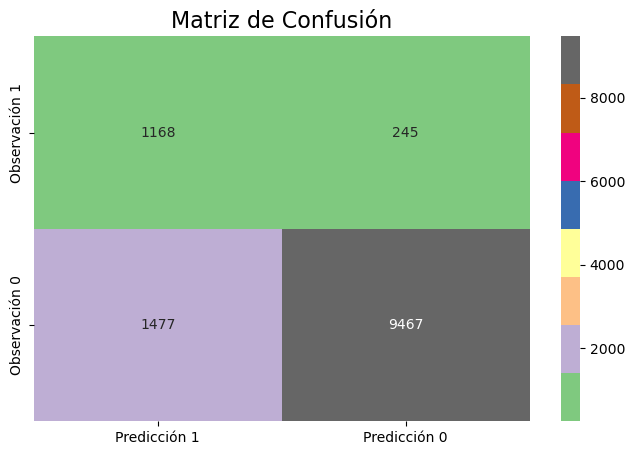

In [11]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ['Observación 1', 'Observación 0']], columns = [i for i in ['Predicción 1', 'Predicción 0']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Accent').set_title('Matriz de Confusión', fontsize=16)


#### **Cálculo de primeras medidas de calidad del modelo: Accuracy, Precision, Recall, F1**

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_predict = model.predict(x_test)
model_score = accuracy_score(y_test, y_predict)
recall_score = recall_score(y_test, y_predict)
precision_score = precision_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

print('Medidas de calidad del modelo:')
print('-' * 30)
print(f'Accuracy: {model_score*100:.2f}%')
print(f'Precision: {precision_score*100:.2f}%')
print(f'Recall: {recall_score*100:.2f}%')
print(f'F1 Score: {f1_score*100:.2f}%')
print(f'Roc Auc Score: {roc_auc_score(y_test, y_predict)*100:.2f}%')
print('-' * 30)

# Se agregaron operaciones para calcular las medidas del modelo en porcentajes, para una mejor comprensión de los resultados.

Medidas de calidad del modelo:
------------------------------
Accuracy: 86.06%
Precision: 44.16%
Recall: 82.66%
F1 Score: 57.57%
Roc Auc Score: 84.58%
------------------------------


In [13]:
y_hats = pd.DataFrame(y_predict)

df_out = y_test.reset_index()
df_out['Actual'] = y_test.reset_index()['y']
df_out['Predicción'] = y_hats.reset_index()[0]
df_out.drop('index', axis=1, inplace=True)

df_out = df_out[df_out['Actual'] != df_out['Predicción']]
print(len(df_out), 'observaciones mal clasificadas')

1722 observaciones mal clasificadas


In [14]:
df_out

,y,Actual,Predicción
2,1,1,0
11,0,0,1
13,0,0,1
21,0,0,1
32,0,0,1
...,...,...,...
12319,0,0,1
12331,0,0,1
12336,0,0,1
12340,0,0,1


#### **Conclusiones**

In [ ]:
# Se obtuvieron resultados aceptables, con un accuracy del 86.06%, una precisión del 86.06% y un 
# recall del 86.06%. El F1 Score fue de 86.06%, lo que indica un balance promedio entre precisión y recall.